In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
file_path1 = 'moweapi00080_2023_11_16\HDGeneratorIREG01.csv'
data1 = pd.read_csv(file_path1)

anemometer_file_path = "moweapi00080_2023_11_16\WindgeberHD.csv"
wind_speed_data = pd.read_csv(anemometer_file_path)

In [3]:
data1.head()

,name,time,TURBINEID,DEVICETYPE,DEVICEID,IREG_UBUS,IREG_IBUS,IREG_SPEED,IREG_PWM,IREG_CHOPPER_PWM,IREG_IGBT_TEMP,IREG_MOTOR_TEMP
0,GeneratorIREG01,1698939803000000000,01,Generator,x001,0.5,-0.007,0,0,0,0,12
1,GeneratorIREG01,1698939813000000000,01,Generator,x001,0.3,-0.007,0,0,0,0,12
2,GeneratorIREG01,1698939823000000000,01,Generator,x001,0.2,-0.007,0,0,0,0,12
3,GeneratorIREG01,1698939833000000000,01,Generator,x001,0,-0.007,0,0,0,0,11
4,GeneratorIREG01,1698939843000000000,01,Generator,x001,0,-0.007,0,0,0,0,11


In [4]:
wind_speed_data.head()

,name,time,windspeed,windspeed_MW
0,windgeber,1698745499000000000,7.2,9
1,windgeber,1698745500000000000,7.2,9
2,windgeber,1698745501000000000,7.2,9
3,windgeber,1698745502000000000,6.8,8.9
4,windgeber,1698745503000000000,7.6,8.9


In [7]:
data1.drop(columns=['name', 'TURBINEID', 'DEVICETYPE', 'DEVICEID'], inplace=True)

In [8]:
wind_speed_data.drop(columns=['name', 'windspeed_MW'], inplace=True)

In [9]:
wind_speed_data.head()

,time,windspeed
0,1698745499000000000,7.2
1,1698745500000000000,7.2
2,1698745501000000000,7.2
3,1698745502000000000,6.8
4,1698745503000000000,7.6


In [10]:
data1.describe()

,time,IREG_UBUS,IREG_IBUS,IREG_SPEED,IREG_PWM,IREG_CHOPPER_PWM,IREG_IGBT_TEMP,IREG_MOTOR_TEMP
count,144006,144006,144006,144006,144006,144006,144006,144006
unique,143993,1427,1894,789,80,11,3,53
top,time,0,-0.007,0,0,0,0,10
freq,14,65161,97068,113941,72169,143978,143881,20780


In [11]:
print("data1 size: ",len(data1))
print("wind_speed_data size: ",len(wind_speed_data))

data1 size:  144006
wind_speed_data size:  1378140


In [12]:
print(data1['time'].duplicated().sum())  # Number of duplicate entries in df1
print(wind_speed_data['time'].duplicated().sum())  # Number of duplicate entries in df2

13
136


In [13]:
data1 = data1.drop_duplicates(subset='time')

wind_speed_data = wind_speed_data.drop_duplicates(subset='time')

In [14]:
# Merging both DataFrames based on 'time' column, keeping only the intersection
merged_df = pd.merge(wind_speed_data, data1, on='time', how='inner')

In [15]:
print(len(data1['time'].unique()))
print(len(wind_speed_data['time'].unique()))
print(len(merged_df['time'].unique()))

143993
1378004
143706


In [16]:
merged_df.head()

,time,windspeed,IREG_UBUS,IREG_IBUS,IREG_SPEED,IREG_PWM,IREG_CHOPPER_PWM,IREG_IGBT_TEMP,IREG_MOTOR_TEMP
0,time,windspeed,IREG_UBUS,IREG_IBUS,IREG_SPEED,IREG_PWM,IREG_CHOPPER_PWM,IREG_IGBT_TEMP,IREG_MOTOR_TEMP
1,1698939803000000000,5.2,0.5,-0.007,0,0,0,0,12
2,1698939813000000000,5.6,0.3,-0.007,0,0,0,0,12
3,1698939823000000000,5.2,0.2,-0.007,0,0,0,0,12
4,1698939833000000000,6,0,-0.007,0,0,0,0,11


In [17]:
len(merged_df)

143706

In [18]:
merged_df.describe()

,time,windspeed,IREG_UBUS,IREG_IBUS,IREG_SPEED,IREG_PWM,IREG_CHOPPER_PWM,IREG_IGBT_TEMP,IREG_MOTOR_TEMP
count,143706,143706,143706,143706,143706,143706,143706,143706,143706
unique,143706,48,1427,1894,789,80,11,3,53
top,time,4,0,-0.007,0,0,0,0,10
freq,1,10061,65053,96895,113735,72046,143691,143594,20741


## Filtering data for MPPT Mode
Because mapping is required only when the turbine is in MPPT mode

In [19]:
merged_df['IREG_SPEED'] = pd.to_numeric(merged_df['IREG_SPEED'], errors='coerce')

In [20]:
merged_df['IREG_SPEED']

0           NaN
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
143701    326.0
143702    361.0
143703    329.0
143704    379.0
143705    370.0
Name: IREG_SPEED, Length: 143706, dtype: float64

In [21]:
filtered_data = merged_df[(merged_df['IREG_SPEED'] >= 400) & (merged_df['IREG_SPEED'] <= 750)]

In [22]:
len(filtered_data)

22973

In [23]:
filtered_data.reset_index(drop=True, inplace=True)
data=filtered_data.drop(columns=['time'])

In [24]:
data

,windspeed,IREG_UBUS,IREG_IBUS,IREG_SPEED,IREG_PWM,IREG_CHOPPER_PWM,IREG_IGBT_TEMP,IREG_MOTOR_TEMP
0,5.2,201.1,0.99,696.0,62,0,0,12
1,4.4,198.3,1.485,701.0,64,0,0,12
2,6,204.8,1.321,733.0,61,0,0,13
3,4.8,198.2,0.46,621.0,63,0,0,14
4,5.2,198.6,0.247,588.0,64,0,0,14
...,...,...,...,...,...,...,...,...
22968,7.2,197.8,0.64,424.0,78,0,0,23
22969,7.6,198.8,0.541,466.0,75,0,0,23
22970,7.2,199.9,1.028,524.0,74,0,0,23
22971,7.2,201.9,0.59,485.0,73,0,0,24


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22973 entries, 0 to 22972
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   windspeed         22973 non-null  object 
 1   IREG_UBUS         22973 non-null  object 
 2   IREG_IBUS         22973 non-null  object 
 3   IREG_SPEED        22973 non-null  float64
 4   IREG_PWM          22973 non-null  object 
 5   IREG_CHOPPER_PWM  22973 non-null  object 
 6   IREG_IGBT_TEMP    22973 non-null  object 
 7   IREG_MOTOR_TEMP   22973 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


In [26]:
data['IREG_UBUS'] = pd.to_numeric(data['IREG_UBUS'], errors='coerce')
data['IREG_IBUS'] = pd.to_numeric(data['IREG_IBUS'], errors='coerce')
data['IREG_PWM'] = pd.to_numeric(data['IREG_PWM'], errors='coerce')
data['IREG_CHOPPER_PWM'] = pd.to_numeric(data['IREG_CHOPPER_PWM'], errors='coerce')
data['IREG_IGBT_TEMP'] = pd.to_numeric(data['IREG_IGBT_TEMP'], errors='coerce')
data['IREG_MOTOR_TEMP'] = pd.to_numeric(data['IREG_MOTOR_TEMP'], errors='coerce')
data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce')

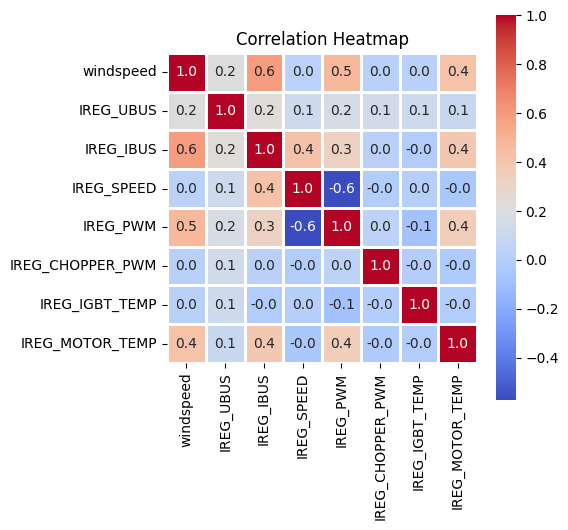

In [27]:
corr_mat = data.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=1, fmt='.1f', square = True)
plt.title('Correlation Heatmap')
plt.show()

We can drop the following features:
1. IREG_CHOPPER_PWM (Chopper Duty Cycle): No correlation (0.0) with turbine speed, so you can drop this feature.
2. IREG_IGBT_TEMP (IGBT Module Temperature): No correlation (0.0), so it can be dropped.
3. IREG_MOTOR_TEMP (Generator Temperature): No correlation (0.0), so it can be dropped.

In [31]:
X = data.drop(columns=['IREG_CHOPPER_PWM', 'IREG_IGBT_TEMP', 'IREG_MOTOR_TEMP'])

## Splitting the data into label and features

In [32]:
y = X['IREG_SPEED']

In [33]:
y = pd.DataFrame(y)

In [34]:
X = X.drop(columns=['IREG_SPEED'])

In [35]:
# X

## Normalizing the data

In [36]:
X_scaler = StandardScaler()
X_scaler.fit(X)
X_scaled = X_scaler.transform(X)

y_scaler = StandardScaler()
y_scaler.fit(y)
y_scaled = y_scaler.transform(y)

In [37]:
X_scaled

array([[-0.47846344,  0.27012557,  1.29162489, -0.64236397],
       [-0.96433992, -0.37941015,  2.69943282, -0.27855884],
       [ 0.00741304,  1.12844063,  2.23300757, -0.82426653],
       ...,
       [ 0.73622775, -0.00824688,  1.39969903,  1.54046681],
       [ 0.73622775,  0.4557072 ,  0.15400232,  1.35856424],
       [ 0.49328952, -0.03144459,  0.18528694,  2.26807707]])

In [38]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [39]:
X_scaled

,windspeed,IREG_UBUS,IREG_IBUS,IREG_PWM
0,-0.478463,0.270126,1.291625,-0.642364
1,-0.964340,-0.379410,2.699433,-0.278559
2,0.007413,1.128441,2.233008,-0.824267
3,-0.721402,-0.402608,-0.215725,-0.460461
4,-0.478463,-0.309817,-0.821509,-0.278559
...,...,...,...,...
22968,0.736228,-0.495399,0.296205,2.268077
22969,0.979166,-0.263422,0.014644,1.722369
22970,0.736228,-0.008247,1.399699,1.540467
22971,0.736228,0.455707,0.154002,1.358564


In [40]:
y_scaled

,IREG_SPEED
0,1.337333
1,1.396456
2,1.774842
3,0.450489
4,0.060278
...,...
22968,-1.878952
22969,-1.382320
22970,-0.696494
22971,-1.157653


## Feature Engineering

In [41]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

## Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# train_X, val_X, train_y, val_y = train_test_split(X_poly, y, test_size=0.1, random_state=42)

train_X, val_X, train_y, val_y = train_test_split(X_scaled, y_scaled, test_size=0.4, random_state=42)

In [44]:
len(train_X)

13783

In [45]:
len(val_X)

9190

## Using LightGBM (Light Gradient Boosting Machine)

In [46]:
# from lightgbm import LGBMRegressor

In [47]:
# lightgbm_model = LGBMRegressor(learning_rate=0.01, n_estimators=200)
# lightgbm_model.fit(train_X, train_y.values.ravel())

In [48]:
# preds5 = lightgbm_model.predict(val_X)

In [49]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# print("MAE: ", mean_absolute_error(val_y, preds5))
# print("RMSE: ",np.sqrt(mean_squared_error(val_y, preds5)))
# print("R2 Score: ", r2_score(val_y, preds5))

## Using XGBoost

In [50]:
import xgboost as xgb

In [51]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(train_X, train_y.values.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
preds = xgb_model.predict(val_X)

In [53]:
preds = pd.DataFrame(preds)
val_y = pd.DataFrame(val_y)
val_y.reset_index(drop=True, inplace=True)

In [54]:
val_y_unscaled = pd.DataFrame(y_scaler.inverse_transform(val_y))
preds_unscaled = pd.DataFrame(y_scaler.inverse_transform(preds))

In [55]:
val_y_unscaled.rename(columns={0: 'Actual Turbine Speed'}, inplace=True)
val_y_unscaled

,Actual Turbine Speed
0,640.0
1,588.0
2,630.0
3,458.0
4,675.0
...,...
9185,660.0
9186,625.0
9187,571.0
9188,650.0


In [56]:
preds_unscaled.rename(columns={0: 'Predicted Turbine Speed'}, inplace=True)
preds_unscaled

,Predicted Turbine Speed
0,636.171448
1,588.260803
2,636.521118
3,461.427856
4,675.606079
...,...
9185,658.500244
9186,627.180481
9187,568.483276
9188,642.502075


In [57]:
combined_df = pd.concat([val_y_unscaled, preds_unscaled], axis=1)

In [58]:
combined_df

,Actual Turbine Speed,Predicted Turbine Speed
0,640.0,636.171448
1,588.0,588.260803
2,630.0,636.521118
3,458.0,461.427856
4,675.0,675.606079
...,...,...
9185,660.0,658.500244
9186,625.0,627.180481
9187,571.0,568.483276
9188,650.0,642.502075


In [61]:
print("MAE: ", mean_absolute_error(val_y, preds))
print("RMSE: ",np.sqrt(mean_squared_error(val_y, preds)))
print("R2 Score: ", r2_score(val_y, preds))

MAE:  0.04944329288960195
RMSE:  0.08265456310978701
R2 Score:  0.9931783931047864


In [62]:
type(val_y_unscaled)

pandas.core.frame.DataFrame

In [63]:
type(preds_unscaled)

pandas.core.frame.DataFrame

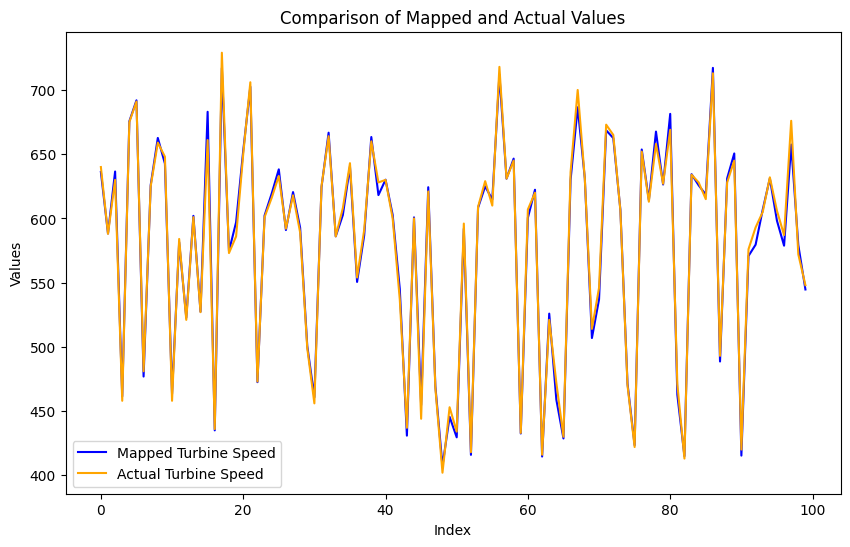

In [64]:
import matplotlib.pyplot as plt

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(preds_unscaled[0:100].index, preds_unscaled[0:100].values, label='Mapped Turbine Speed', color='blue')
plt.plot(val_y_unscaled[0:100].index, val_y_unscaled[0:100].values, label='Actual Turbine Speed', color='orange')

plt.title('Comparison of Mapped and Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()